In [226]:
import pandas as pd

data = pd.read_csv("dds_ch2_nyt\\nyt1.csv")

data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


<AxesSubplot:>

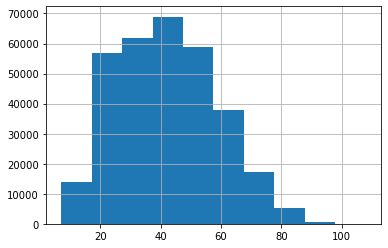

In [227]:
data_no_null_age = data[data.Age > 0]

data_no_null_age.Age.hist()

In [228]:
def setAgeGroup(age):
    if (age < 18):
        return "<18"
    elif (age < 25):
        return "18-24"
    elif (age < 35):
        return "25-34"
    elif (age < 45):
        return "35-44"
    elif (age < 55):
        return "45-54"
    elif (age < 65):
        return "55-64"
    elif (age >= 65):
        return "65+"

data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))

data_no_null_age

C:\Users\podol\AppData\Local\Temp\ipykernel_24424\1456086913.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [229]:
data_sorted = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").mean()
data_sorted["CTR"] = data_sorted.Clicks / data_sorted.Impressions
data_sorted

,Age,Impressions,Clicks,CTR
AgeGroup,,,,
18-24,20.833317,5.002826,0.053251,0.010644
25-34,29.503352,4.993829,0.050486,0.010110
35-44,39.494680,5.021507,0.051679,0.010292
45-54,49.492580,5.010406,0.050274,0.010034
55-64,59.498189,5.022308,0.101837,0.020277
65+,72.988697,5.012347,0.151289,0.030183
<18,15.262149,5.007159,0.149335,0.029824


<AxesSubplot:xlabel='AgeGroup', ylabel='CTR value'>

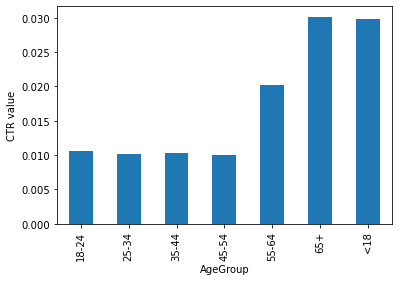

In [230]:
data_sorted.CTR.plot(kind="bar", ylabel = "CTR value")

<AxesSubplot:xlabel='Gender', ylabel='amount of people'>

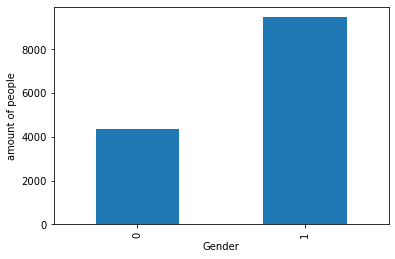

In [231]:
data_teen_genders = data_no_null_age.loc[data_no_null_age["AgeGroup"] == "<18"].groupby("Gender").count()
data_teen_genders.AgeGroup.plot(kind="bar", ylabel = "amount of people")

<AxesSubplot:xlabel='Gender', ylabel='CTR value'>

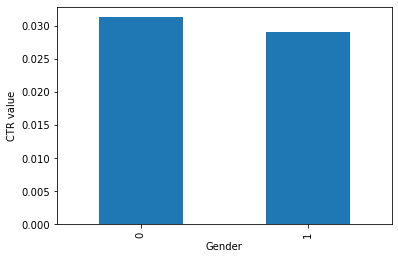

In [232]:
data_teen_genders = data_no_null_age.loc[data_no_null_age["AgeGroup"] == "<18"].groupby("Gender")
CTR_teen = data_teen_genders.Clicks.sum() / data_teen_genders.Impressions.sum()
CTR_teen.plot(kind="bar", ylabel = "CTR value")

<AxesSubplot:xlabel='Gender', ylabel='Impressions mean'>

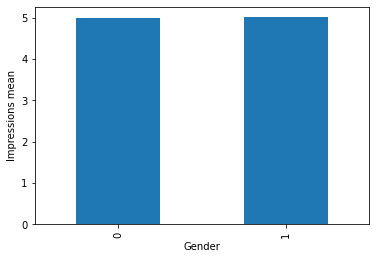

In [233]:
data_teen_genders.Impressions.mean().plot(kind="bar", ylabel = "Impressions mean")

<AxesSubplot:xlabel='Gender', ylabel='Impressions median'>

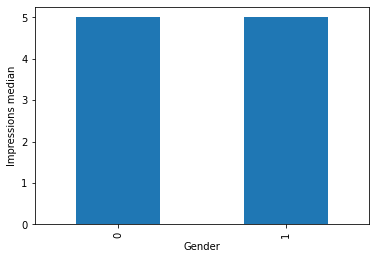

In [234]:
data_teen_genders.Impressions.median().plot(kind="bar", ylabel = "Impressions median")

<AxesSubplot:xlabel='Gender', ylabel='Impressions dispersion'>

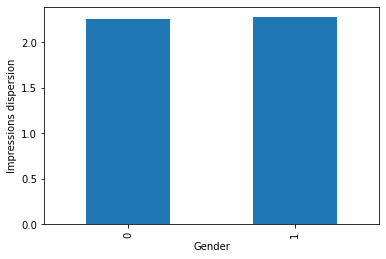

In [235]:
data_teen_genders.Impressions.std().plot(kind="bar", ylabel = "Impressions dispersion")


<AxesSubplot:xlabel='Gender', ylabel='Impressions maximum'>

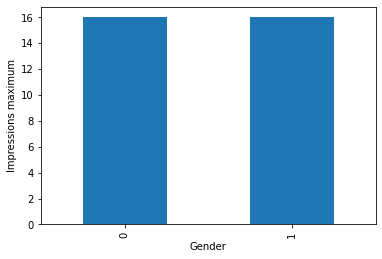

In [236]:
data_teen_genders.Impressions.max().plot(kind="bar", ylabel = "Impressions maximum")

In [237]:
final_data_frame = data_sorted.Impressions.to_frame()
final_data_frame.rename(columns={"Impressions": "Mean Impressions"}, inplace=True)
final_data_frame["CTR"] = data_sorted["CTR"]
final_data_frame["Impressions quantile"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.quantile(0.7)
final_data_frame["Median Impressions"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.median()
final_data_frame["Max Impressions"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.max()
final_data_frame["Dispersion Impressions"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.std()
final_data_frame["Mean Clicks"] = data_sorted.Clicks
final_data_frame["Clicks quantile"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Clicks.quantile(0.9)
final_data_frame["Median Clicks"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Clicks.median()
final_data_frame["Max Clicks"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Clicks.max()
final_data_frame["Dispersion Clicks"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Clicks.std()
final_data_frame

,Mean Impressions,CTR,Impressions quantile,Median Impressions,Max Impressions,Dispersion Impressions,Mean Clicks,Clicks quantile,Median Clicks,Max Clicks,Dispersion Clicks
AgeGroup,,,,,,,,,,,
18-24,5.002826,0.010644,6.0,5.0,17,2.244950,0.053251,0.0,0.0,2,0.231010
25-34,4.993829,0.010110,6.0,5.0,17,2.226877,0.050486,0.0,0.0,2,0.224147
35-44,5.021507,0.010292,6.0,5.0,20,2.237829,0.051679,0.0,0.0,3,0.225861
45-54,5.010406,0.010034,6.0,5.0,17,2.240790,0.050274,0.0,0.0,2,0.225034
55-64,5.022308,0.020277,6.0,5.0,16,2.230206,0.101837,0.0,0.0,3,0.318704
65+,5.012347,0.030183,6.0,5.0,16,2.249162,0.151289,1.0,0.0,3,0.384373
<18,5.007159,0.029824,6.0,5.0,16,2.271897,0.149335,1.0,0.0,3,0.383411
